#### Vitruvian Man

When Leonardo da Vinci drew the now-famous image of a human male circumscribed by a circle and a square, he was conveying the ideal of human body proportions. He wrote, in mirror script, accompanying the drawing: 

"For the human body is so designed by nature that the face, from the chin to the top of the forehead and the lowest roots of the hair, is a tenth part of the whole height; the open hand from the wrist to the tip of the middle finger is just the same; the head from the chin to the crown is an eighth, and with the neck and shoulder from the top of the breast to the lowest roots of the hair is a sixth; from the middle of the breast to the summit of the crown is a fourth. If we take the height of the face itself, the distance from the bottom of the chin to the under side of the nostrils is one third of it; the nose from the under side of the nostrils to a line between the eyebrows is the same; from there to the lowest roots of the hair is also a third, comprising the forehead. The length of the foot is one sixth of the height of the body; of the forearm, one fourth; and the breadth of the breast is also one fourth. The other members, too, have their own symmetrical proportions, and it was by employing them that the famous painters and sculptors of antiquity attained to great and endless renown.

Similarly, in the members of a temple there ought to be the greatest harmony in the symmetrical relations of the different parts to the general magnitude of the whole. Then again, in the human body the central point is naturally the navel. For if a man be placed flat on his back, with his hands and feet extended, and a pair of compasses centred at his navel, the fingers and toes of his two hands and feet will touch the circumference of a circle described therefrom. And just as the human body yields a circular outline, so too a square figure may be found from it. For if we measure the distance from the soles of the feet to the top of the head, and then apply that measure to the outstretched arms, the breadth will be found to be the same as the height, as in the case of plane surfaces which are perfectly square."

#### Scientific Question: 
Now, we ask: Is it the case that man (or woman) is as tall as he (she) is wide? Is the length of the body, measured from the top of the head to the bottom of the feet, indeed equal to the width of the body from outstretched finger to outstretched finger? 

#### Hypothesis: 
Null hypothesis: The length and width of human bodies is, on the whole, equal. 

#### Methods: 
All participants were socially pressured to participate and no signed consent was acquired. (What is the Declaration of Helsinki, anyway?) See next block for demographics. 



In [182]:
% participant_data = {'subjID',age,height,width,female?}

participant_data = {...
'V1',27,166.5,169,1;
'A1',26,169,172.5,1;
'V2',31,161.5,155.5,1;
'M1',25,160,155,1;
'C1',26,185,181,1;
'D1',30,184,192.5,0;
'F1',33,172,175,0;
'D2',28,172,173,0;
'S1',30,177,171,1};
N = length(participant_data);
Nfemales = sum(cell2mat(participant_data(:,5)));
Mage = mean(cell2mat(participant_data(:,2))); STDage = std(cell2mat(participant_data(:,2)));
heights = cell2mat(participant_data(:,3));
widths = cell2mat(participant_data(:,4));
format long g
fprintf('%d "adults" (%d females, mean age %.2f, +/- %.2f std) participated in this study.',N,Nfemales,Mage,STDage);

9 "adults" (6 females, mean age 28.44, +/- 2.70 std) participated in this study.


#### Correlate Heights and Widths

The correlation between height and width is r = 0.907489, with a p-value of 0.000724!


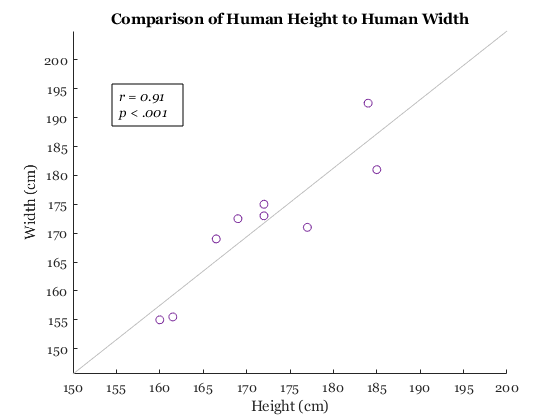

In [157]:
%% Plot
hxw_fig = scatter(heights,widths,'markeredgecolor', [127/255, 49/255, 158/255]);
set(gca, 'FontName', 'Georgia')
xlabel('Height (cm)')
xlim([150 200])
xticks([150:5:200])
ylabel('Width (cm)')
ylim([150 200])
title('Comparison of Human Height to Human Width','FontWeight','bold')

%% Regression line & correlation coefficient
reg_line = lsline;
[r,p] = corrcoef(heights,widths);
r = r(1,2);
p = p(1,2);

fprintf('The correlation between height and width is r = %f, with a p-value of %f!',r,p);
if p < .05 && p > .001
    pval = 'p < .05';
elseif p < .001
    pval = 'p < .001';
elseif p > .05
    pval = 'p > .05';
end
dim = [0.2 0.5 0.3 0.3];
format long g;
str = {['r = ' , num2str([round(r*100)/100])],pval};
annotation('textbox',dim,'String',str,'FitBoxToText','on','FontAngle','italic','FontName','Georgia');

So, clearly we are not exactly as wide as we are tall. If the correlation coefficient were equal to 1, we would still only be able to conclude that a change in height results in a change in width of the same magnitude. This wouldn't quite tell us that those two values would always be identical. 

However, a correlation of 0.91 is insanely high, and a glance at the graph above tells us that height predicts width with pretty high accuracy.

#### Compare Mean Heights and Widths

Let's look a bit more closely at our sample's heights and widths:

In [86]:
avgheight = mean(heights);
stdheight = std(heights);
semheight = stdheight/sqrt(length(heights));
avgwidth = mean(widths);
stdwidth = std(widths);
semwidth = stdwidth/sqrt(length(widths));

The mean difference between height and width is 0.277778. This difference did not reach significance!


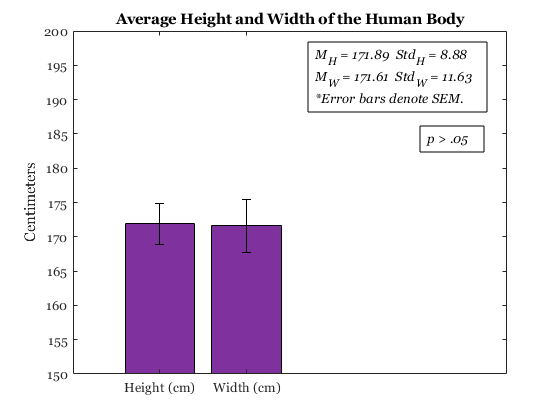

In [155]:
% Plot
bar([1 2],[avgheight,avgwidth],'facecolor',[127/255, 49/255, 158/255]);
hold on
errorbar([1 2],[avgheight,avgwidth],[semheight,semwidth],'color','k','LineStyle','none')
set(gca, 'FontName', 'Georgia') 
xticklabels({'Height (cm)','Width (cm)'})
ylabel('Centimeters')
xlim([0 5])
ylim([150 200])
dim = [.55 0.6 0.3 0.3];
format long g;
str = {['M_{H} = ',num2str([round(avgheight*100)/100]),'  Std_{H} = ',num2str([round(stdheight*100)/100])],...
['M_{W} = ', num2str([round(avgwidth*100)/100]),'  Std_{W} = ', num2str([round(stdwidth*100)/100])],...
'*Error bars denote SEM.'};
annotation('textbox',dim,'String',str,'FitBoxToText','on','FontAngle','italic','FontName','Georgia');
title('Average Height and Width of the Human Body')

%% T-Test
[h,p] = ttest(heights,widths);
fprintf('The mean difference between height and width is %f. ',avgheight-avgwidth);
if h == 0
fprintf('This difference did not reach significance!');
else
fprintf('This difference is significant.');
end

if .001 < p < .05
    pval = 'p < .05';
elseif p < .001
    pval = 'p < .001';
elseif p > .05
    pval = 'p > .05';
end
dim = [.75 0.4 0.3 0.3];
format long g;
str = {pval};
annotation('textbox',dim,'String',str,'FitBoxToText','on','FontAngle','italic','FontName','Georgia');
title('Average Height and Width of the Human Body')

#### Conclusions

Our correlational analysis of height and width revealed that height and width are tighly correlated in humans (both males and females). While the proportion of height to width is nearly equal, people typically have a slightly shorter wingspan compared with their height. Note that width is also slightly more variable across subjects. 

After comparing the distribution of heights and widths, we accept the null hypothesis that no differences exist in the means of height and width. Since no sigificant difference exists between height and width, and we may declare that we are indeed Vitruvian Men and Women! 